In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import cmocean
#import netCDF4 as nc
import scipy as sc


In [11]:
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Load CTD data


In [12]:
CTD_data = sc.io.loadmat("D:/Sermilik/CTD/SF2023CTDtrimmed_downcasts.mat", variable_names=['date','lat','lon','temp','sal','pres'])
p = CTD_data['pres']
T = CTD_data['temp']
S = CTD_data['sal']

# Data explore

#### Temperature profiles

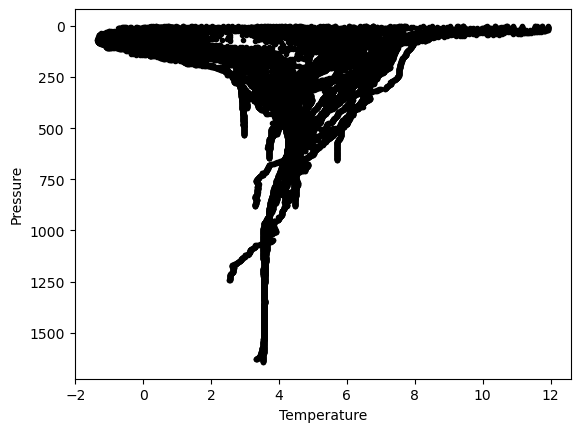

In [13]:
fig = plt.figure()
plt.plot(T,p, 'k.');
plt.gca().invert_yaxis()
plt.xlabel('Temperature')
plt.ylabel('Pressure');

#### Water masses

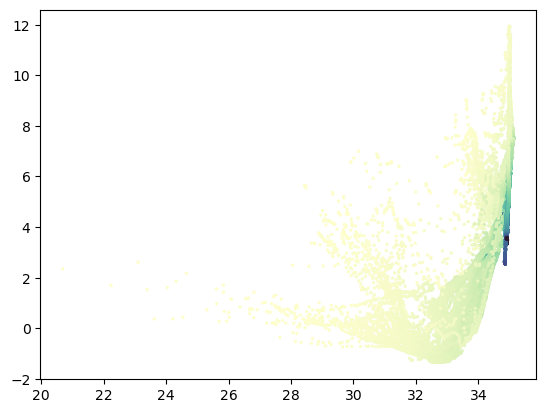

In [14]:
plt.scatter(S, T, c=p, s=2, cmap=cmocean.cm.deep);

## Select T and S for calfiles
Select T and S at ~50 dbar

In [54]:
target_pres = 100 #dbar

In [55]:
np.nanargmin(np.abs(p-target_pres),axis=1)

array([99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 94, 99, 99, 99, 99, 99, 98, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99],
      dtype=int64)

ok bin 50 is 50 dbar...

Choose 2 bins above and 2 bins below to avoid outliers

In [56]:
bin_select = np.arange(5,200)

In [57]:
bin_select

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

In [58]:
T_select = T[:,bin_select]
S_select = S[:,bin_select]

In [59]:
T_mean = np.mean(T_select, axis=1)
S_mean = np.mean(S_select, axis=1)

In [61]:
# convert timestamps
timestamps = pd.to_datetime(CTD_data['date']-719529, unit='D')

In [62]:
np.shape(timestamps.values[0,:])

(83,)

In [63]:
CTD_select = pd.DataFrame({'Time':timestamps.values[0,:], 'Temp':T_mean, 'Sal':S_mean})

In [64]:
CTD_select

,Time,Temp,Sal
0,2023-08-06 11:09:28.000000256,7.836415,35.039118
1,2023-08-06 14:51:44.999999232,7.527836,35.009731
2,2023-08-06 17:51:57.000004608,7.521628,35.007037
3,2023-08-06 19:32:00.999997440,7.759236,35.052506
4,2023-08-06 21:49:34.999996928,7.669194,35.067433
...,...,...,...
78,2023-08-17 04:39:23.999998464,8.327316,35.026375
79,2023-08-17 06:05:18.999999744,7.981704,34.969744
80,2023-08-17 10:41:59.999997440,7.748855,35.002955
81,2023-08-17 15:52:34.000001792,8.191238,35.036079


In [65]:
CTD_time=CTD_select.groupby('Time').mean()

In [66]:
CTD_day = CTD_time.groupby(pd.Grouper(freq='24H')).mean()

<Axes: xlabel='Time'>

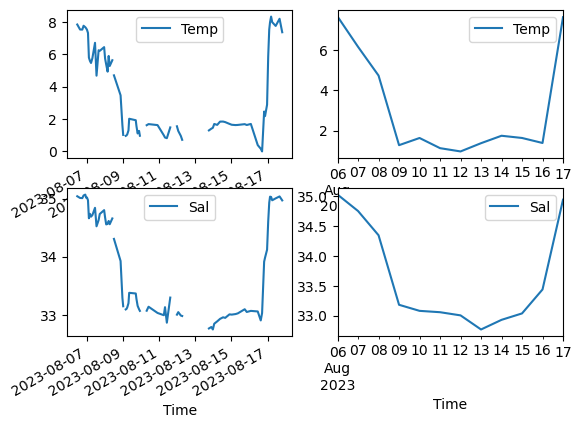

In [67]:
fig, ax = plt.subplots(2,2)
CTD_select.plot(ax=ax[0,0], x='Time', y='Temp')
CTD_day.plot(ax=ax[0,1], y='Temp', use_index=True)
CTD_select.plot(ax=ax[1,0], x='Time', y='Sal')
CTD_day.plot(ax=ax[1,1], y='Sal', use_index=True)

Daily T and S are enough to summarize the overall variability and allows to have a datapoint at every query (not enough CTDs for 6h or 12h consistently) 

In [68]:
CTD_day

,Temp,Sal
Time,,
2023-08-06,7.652417,35.031627
2023-08-07,6.152900,34.756186
2023-08-08,4.730001,34.350072
2023-08-09,1.281375,33.184586
2023-08-10,1.636606,33.082876
2023-08-11,1.132894,33.060121
2023-08-12,0.970529,33.007039
2023-08-13,1.379227,32.770652
2023-08-14,1.747741,32.932164


### Vessel transect

### zoomed trajectories

# Load echo data

# On map

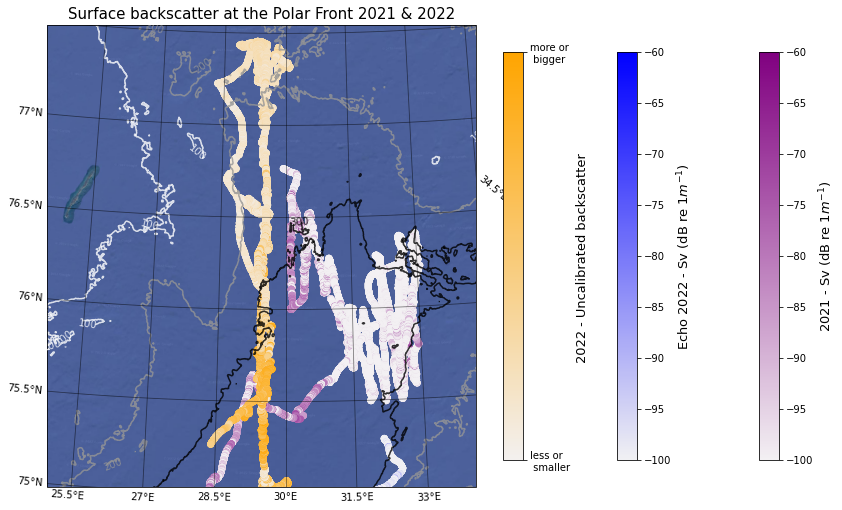

In [21]:
fig   = plt.figure(figsize=(15,15))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent_zoom=[25, 34, 75, 77.5]
ax.set_extent(extent_zoom, crs = ccrs.PlateCarree())

cs = ax.contour(lons,lats,bathy, levels=[100, 200, 300], cmap='Greys', alpha = 0.8, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add vessel transect
#plt.plot(HH_2022.Longitude, HH_2022.Latitude, '--', c='darkred', transform=ccrs.PlateCarree())

# Add transects
ax_0 = plt.scatter(Isk_21_df['Long'], Isk_21_df['Lat'], c=Isk_21_df['Sv_mean'], transform=ccrs.PlateCarree(), cmap=sns.color_palette("light:purple", as_cmap=True))
ax_1 = plt.scatter(Echo_22_df['Long'], Echo_22_df['Lat'], c=Echo_22_df['Sv_mean'], transform=ccrs.PlateCarree(), cmap=sns.color_palette("light:blue", as_cmap=True))
ax_2 = plt.scatter(Isk_22_df['Long'], Isk_22_df['Lat'], c=Isk_22_df['Sv_mean'], transform=ccrs.PlateCarree(), cmap=sns.color_palette("light:orange", as_cmap=True))

# Consistent cbar
ax_0.set_clim([-100,-60])
ax_1.set_clim([-100,-60])
ax_2.set_clim([-90,-50])

# add all cbar
cbar_0 = plt.colorbar(ax_0, shrink=0.5)
cbar_0.set_label('2021 - Sv (dB re $1m^{-1}$)', fontsize=13)

cbar_1 = plt.colorbar(ax_1, shrink=0.5)
cbar_1.set_label('Echo 2022 - Sv (dB re $1m^{-1}$)', fontsize=13)

cbar_2 = fig.colorbar(ax_2, shrink=0.5, ticks=[-90, -50])
cbar_2.set_label('2022 - Uncalibrated backscatter ', fontsize=13)
cbar_2.ax.set_yticklabels(['less or \n smaller', 'more or \n bigger']) 
#plt.colorbar(ax_2, shrink=0.5)

ax.set_title('Surface backscatter at the Polar Front 2021 & 2022', title_font)
#plt.legend(fontsize=12)

fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/PolarFront/HH_May2022/SB_Sv.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

# Only 2022

In [22]:
# Add day labels
SB_Iskant22_daystamp = SB_Iskant22.set_index(['Time']).resample('7d').interpolate()

In [23]:
SB_Iskant22_daystamp = SB_Iskant22_daystamp.reset_index()

In [24]:
# date vessel
HH_2022.Date.unique()[2:]

array(['21.05.2022', '22.05.2022', '23.05.2022', '24.05.2022',
       '25.05.2022'], dtype=object)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


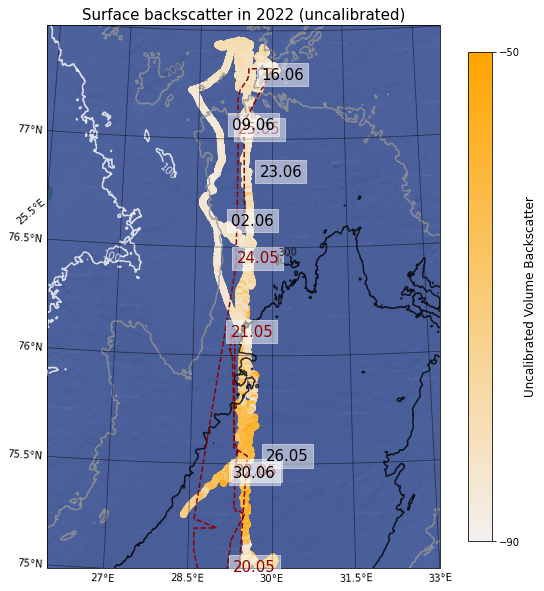

In [25]:
## Make map
fig   = plt.figure(figsize=(10,10))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent_zoom=[26, 33, 75, 77.5]
ax.set_extent(extent_zoom, crs = ccrs.PlateCarree())

cs = ax.contour(lons,lats,bathy, levels=[100, 200, 300], cmap='Greys', alpha = 0.8, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])


## Plot on top of map
# Add vessel transect
plt.plot(HH_2022.Longitude, HH_2022.Latitude, '--',c='darkred', transform=ccrs.PlateCarree())
for day in ['20.05.2022', '21.05.2022', '22.05.2022', '24.05.2022','25.05.2022']:
    ind = np.where(HH_2022.Date==day)[0][0]
    t = ax.text(HH_2022.Longitude[ind], HH_2022.Latitude[ind], HH_2022.Date[ind][:-5],c='darkred', weight = 85, size=15, transform=ccrs.PlateCarree())
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

# Add transects
ax_s = plt.scatter(Isk_22_df['Long'], Isk_22_df['Lat'], c=Isk_22_df['Sv_mean'], transform=ccrs.PlateCarree(), cmap=sns.color_palette("light:orange", as_cmap=True))

for d_ind in range(len(SB_Iskant22_daystamp)-3):
    t = ax.text(SB_Iskant22_daystamp['Long'][d_ind]+0.3, SB_Iskant22_daystamp['Lat'][d_ind], SB_Iskant22_daystamp['Time'][d_ind].strftime("%d.%m"), weight = 85, size=15, transform=ccrs.PlateCarree())
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
                   
                   
# Consistent cbar
ax_s.set_clim([-90,-50])

#ax_2.set_clim([-100,-70])

# add all cbar

cbar = fig.colorbar(ax_s, shrink=0.9, ticks=[-90, -50])
cbar.set_label('Uncalibrated Volume Backscatter', fontsize=12)

#plt.colorbar(ax_2, shrink=0.5)

ax.set_title('Surface backscatter in 2022 (uncalibrated)', title_font)
#plt.legend(fontsize=12)

fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/PolarFront/HH_May2022/SB_Sv_22.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

# Explore and compare correlations

In [26]:
Isk_21_df['platform'] = 'Sailbuoy Iskant 2021'
Echo_22_df['platform'] = 'Sailbuoy Echo 2022'
Isk_22_df['platform'] = 'Sailbuoy Iskant 2022'


PF_data = pd.concat([Isk_21_df, Echo_22_df,Isk_22_df])
# Save dataframe to use in map.
PF_data = PF_data.reset_index()

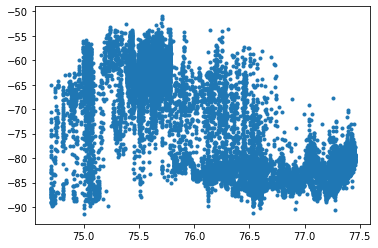

In [34]:
plt.plot(Isk_22_df.Lat, Isk_22_df.Sv_mean, '.')

In [41]:
Isk_22_lat = Isk_22_df.groupby('Lat').median()

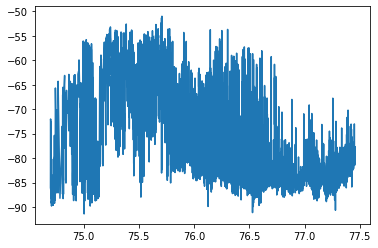

In [44]:
plt.plot(Isk_22_lat.index, Isk_22_lat.Sv_mean)

Text(24.479583333333345, 0.5, 'Sv_mean')

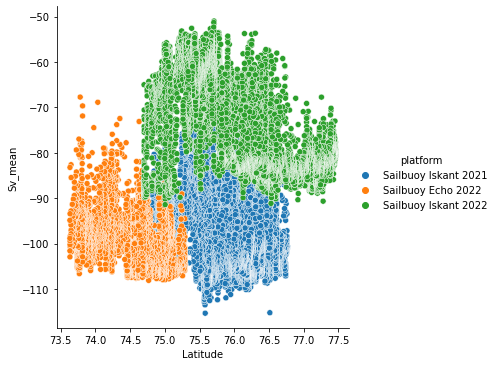

In [28]:
sns.relplot(data=PF_data, x='Lat', y='Sv_mean', hue='platform', kind='scatter')
plt.xlabel('Latitude')
plt.ylabel('Sv_mean')

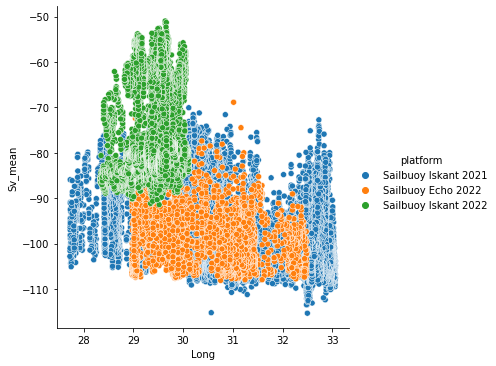

In [29]:
sns.relplot(data=PF_data, x='Long', y='Sv_mean', hue='platform', kind='scatter')


Text(22.47940972222223, 0.5, 'Sv_mean')

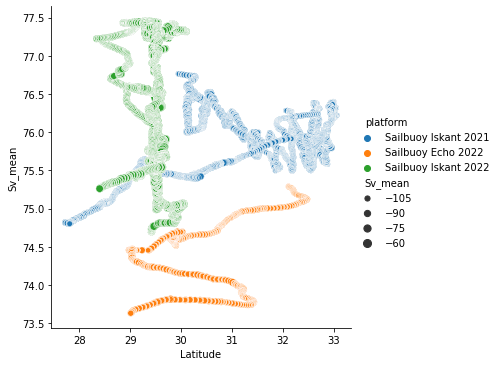

In [30]:
sns.relplot(data=PF_data, x='Long', y='Lat',size='Sv_mean', hue='platform', kind='scatter')
plt.xlabel('Latitude')
plt.ylabel('Sv_mean')